In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

In [54]:
train_df = pd.read_csv('train.tsv', sep='\t')
test_df = pd.read_csv('test.tsv', sep='\t')
val_df = pd.read_csv('valid.tsv', sep='\t')

In [55]:
combined_df = pd.concat([train_df, test_df, val_df], ignore_index=True)

### Data Exploration

In [56]:
combined_df

,id,label,statement,subjects,speaker,speaker_job_title,state,party,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,2635.json,FALSE,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,FALSE,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12786,3419.json,half-true,"For the first time in more than a decade, impo...","energy,oil-spill,trade",barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,a press conference
12787,12548.json,mostly-true,Says Donald Trump has bankrupted his companies...,candidates-biography,hillary-clinton,Presidential candidate,New York,democrat,40.0,29.0,69.0,76.0,7.0,a speech on the economy
12788,401.json,TRUE,"John McCain and George Bush have ""absolutely n...",health-care,campaign-defend-america,NaN,"Washington, D.C.",none,0.0,1.0,0.0,2.0,0.0,a television ad
12789,1055.json,FALSE,A new poll shows 62 percent support the presid...,health-care,americans-united-change,NaN,NaN,none,1.0,4.0,4.0,1.0,0.0,an Internet ad.


#### 12791 total statements

#### Class Distribution across Labels: 

In [57]:
label_counts = combined_df['label'].value_counts(dropna=False)
label_props = combined_df['label'].value_counts(normalize=True, dropna=False)
label_summary = pd.DataFrame({
    'count': label_counts,
    'proportion': label_props,
    'percent': (label_props * 100).round(2)
})
label_summary

,count,proportion,percent
label,,,
half-true,2627,0.205379,20.54
FALSE,2507,0.195997,19.60
mostly-true,2454,0.191854,19.19
barely-true,2103,0.164412,16.44
TRUE,2053,0.160503,16.05
pants-fire,1047,0.081854,8.19


#### Unique Speaker Count

In [58]:
combined_df['speaker'].nunique()

3309

#### Parties

In [59]:
party_counts = combined_df['party'].value_counts(dropna=False)
party_props = combined_df['party'].value_counts(normalize=True, dropna=False)
party_summary = pd.DataFrame({
    'count': party_counts,
    'proportion': party_props,
    'percent': (party_props * 100).round(2)
})
party_summary

,count,proportion,percent
party,,,
republican,5665,0.442890,44.29
democrat,4137,0.323431,32.34
none,2181,0.170511,17.05
organization,264,0.020640,2.06
independent,180,0.014072,1.41
newsmaker,64,0.005004,0.50
libertarian,51,0.003987,0.40
journalist,49,0.003831,0.38
activist,45,0.003518,0.35


#### Unique Contexts

In [60]:
combined_df['context'].nunique()

5142

### Truthfulness Distribution Analysis

In [61]:
label_props = combined_df['label'].value_counts(normalize=True, dropna=False)

trueish = label_props.get('TRUE', 0) + label_props.get('mostly-true', 0)
mixed = label_props.get('half-true', 0)
falseish = (
    label_props.get('barely-true', 0)
    + label_props.get('FALSE', 0)
    + label_props.get('pants-fire', 0)
)

pd.DataFrame({
    'group': ['True-ish', 'Mixed', 'False-ish'],
    'proportion': [trueish, mixed, falseish],
    'percent': [round(trueish * 100, 2), round(mixed * 100, 2), round(falseish * 100, 2)]
})

,group,proportion,percent
0,True-ish,0.352357,35.24
1,Mixed,0.205379,20.54
2,False-ish,0.442264,44.23


### Binary Mapping

In [62]:
binary_map = {
    'TRUE': 'true',
    'mostly-true': 'true',
    'half-true': 'true',      # treat mixed as true for binary
    'barely-true': 'false',
    'FALSE': 'false',
    'pants-fire': 'false'
}

binary_props = combined_df['label'].map(binary_map).value_counts(normalize=True, dropna=False)

binary_props

label
true     0.557736
false    0.442264
Name: proportion, dtype: float64

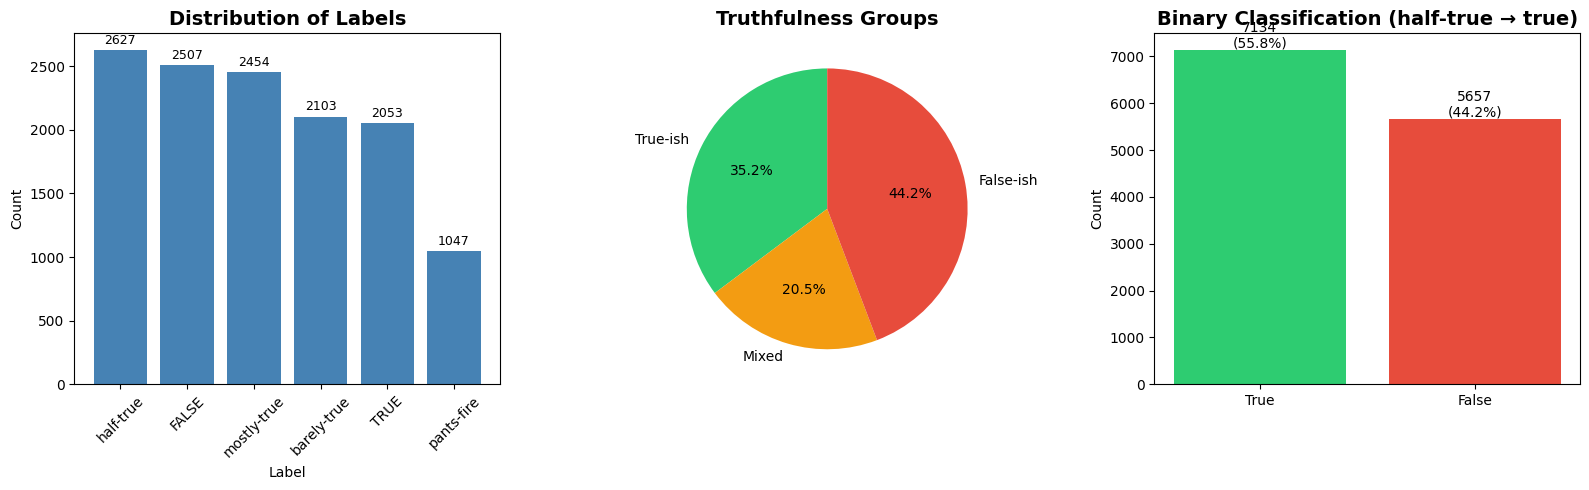

In [63]:
# Bar chart of labels
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# 1. Bar chart - label distribution
ax1 = axes[0]
label_summary_sorted = label_summary.sort_values('count', ascending=False)
ax1.bar(label_summary_sorted.index, label_summary_sorted['count'], color='steelblue')
ax1.set_title('Distribution of Labels', fontsize=14, fontweight='bold')
ax1.set_xlabel('Label')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=45)
for i, v in enumerate(label_summary_sorted['count']):
    ax1.text(i, v + 50, str(v), ha='center', fontsize=9)

# 2. Pie chart - truthfulness groups
ax2 = axes[1]
truthfulness_data = pd.DataFrame({
    'group': ['True-ish', 'Mixed', 'False-ish'],
    'proportion': [trueish, mixed, falseish]
})
colors = ['#2ecc71', '#f39c12', '#e74c3c']
ax2.pie(truthfulness_data['proportion'], labels=truthfulness_data['group'], 
        autopct='%1.1f%%', colors=colors, startangle=90)
ax2.set_title('Truthfulness Groups', fontsize=14, fontweight='bold')

# 3. Binary breakdown
ax3 = axes[2]
binary_counts = combined_df['label'].map(binary_map).value_counts()
ax3.bar(['True', 'False'], binary_counts.values, color=['#2ecc71', '#e74c3c'])
ax3.set_title('Binary Classification (half-true → true)', fontsize=14, fontweight='bold')
ax3.set_ylabel('Count')
for i, v in enumerate(binary_counts.values):
    ax3.text(i, v + 50, f"{v}\n({v/len(combined_df)*100:.1f}%)", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

## Policy Implications

**False-ish statements:** 44.3%  
(barely-true + FALSE + pants-fire)

**True-ish statements:** 35.2%  
(TRUE + mostly-true)

**Mixed statements:** 20.5%  
(half-true)

### Interpretation:
- **44.3% misleading** suggests significant misinformation problem
- **NOT a small minority** → systemic issue
- Broad censorship may be justified
- Nuanced approach needed for "mixed" category

### Party-Level Analysis

In [64]:
# Falsehood rate by party
party_label_counts = combined_df.groupby(['party', 'label']).size().unstack(fill_value=0)
party_totals = party_label_counts.sum(axis=1)

#false-ish rate per party
falseish_labels = ['barely-true', 'FALSE', 'pants-fire']
party_false_counts = party_label_counts[falseish_labels].sum(axis=1)
party_false_rate = (party_false_counts / party_totals * 100).sort_values(ascending=False)

party_false_rate

party
Moderate                        100.000000
constitution-party              100.000000
ocean-state-tea-party-action    100.000000
green                            66.666667
talk-show-host                   62.500000
organization                     51.515152
none                             50.527281
county-commissioner              50.000000
republican                       49.796999
columnist                        47.727273
labor-leader                     46.666667
journalist                       36.734694
newsmaker                        35.937500
activist                         35.555556
democrat                         33.937636
libertarian                      33.333333
independent                      30.000000
tea-party-member                 30.000000
business-leader                  27.272727
state-official                    8.333333
liberal-party-canada              0.000000
government-body                   0.000000
education-official                0.000000
democ

In [65]:
# Average truth score by party (assign numeric scores)
truth_scores = {
    'pants-fire': 0,
    'FALSE': 1,
    'barely-true': 2,
    'half-true': 3,
    'mostly-true': 4,
    'TRUE': 5
}

combined_df['truth_score'] = combined_df['label'].map(truth_scores)
avg_score_by_party = combined_df.groupby('party')['truth_score'].mean().sort_values()

avg_score_by_party

party
constitution-party              0.666667
Moderate                        1.000000
ocean-state-tea-party-action    2.000000
county-commissioner             2.000000
talk-show-host                  2.000000
green                           2.000000
organization                    2.431818
none                            2.435580
republican                      2.554634
tea-party-member                2.600000
labor-leader                    2.666667
columnist                       2.931818
activist                        2.955556
libertarian                     2.960784
journalist                      2.979592
democratic-farmer-labor         3.000000
democrat                        3.048828
newsmaker                       3.093750
independent                     3.222222
government-body                 3.500000
business-leader                 3.545455
state-official                  3.625000
education-official              4.000000
liberal-party-canada            4.000000
Name: trut

In [66]:
# Statistical significance test (ANOVA)
from scipy.stats import f_oneway

# Get top parties for cleaner comparison
top_parties = combined_df['party'].value_counts().head(5).index
party_groups = [combined_df[combined_df['party'] == p]['truth_score'].dropna() 
                for p in top_parties]

f_stat, p_value = f_oneway(*party_groups)

f"F-statistic: {f_stat:.2f}, p-value: {p_value:.4f}, Significant: {p_value < 0.05}"

'F-statistic: 89.13, p-value: 0.0000, Significant: True'

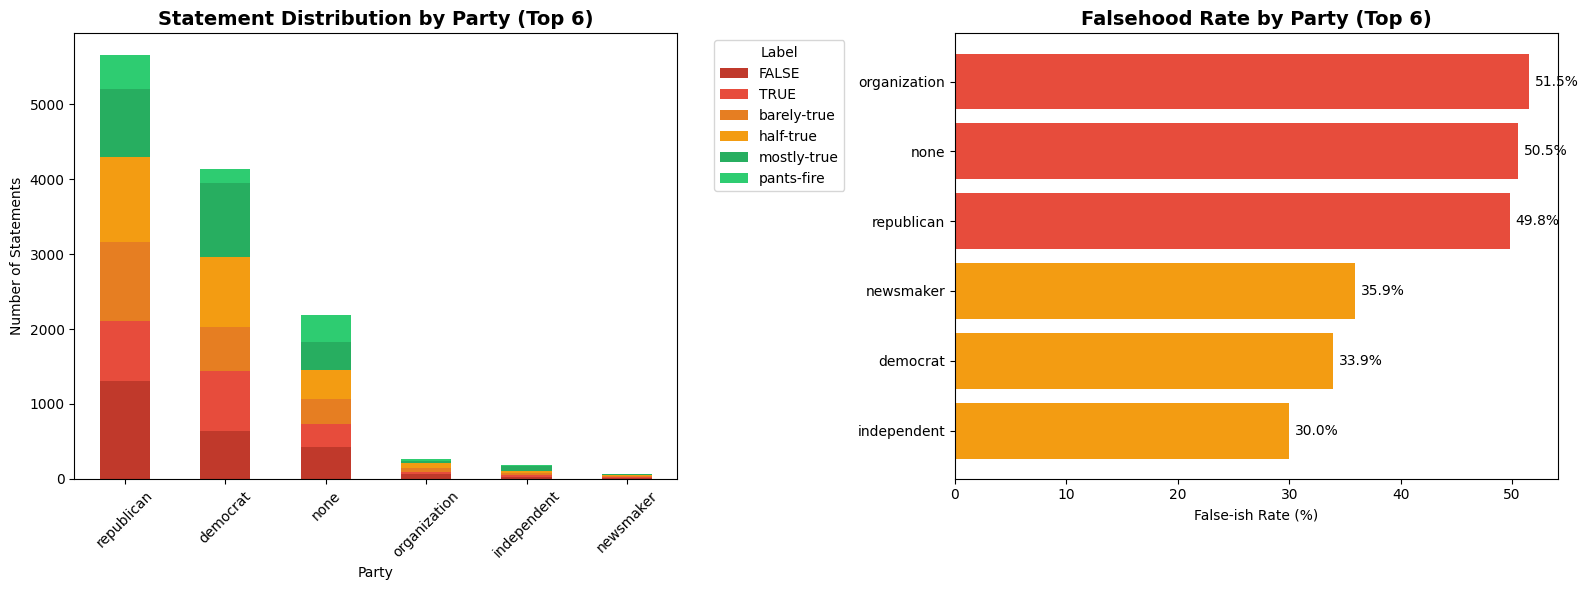

In [67]:
# Visuals: Stacked bars by party
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Stacked bar - top 6 parties
ax1 = axes[0]
top_6_parties = party_totals.nlargest(6).index
party_label_top = party_label_counts.loc[top_6_parties]

party_label_top.plot(kind='bar', stacked=True, ax=ax1, 
                     color=['#c0392b', '#e74c3c', '#e67e22', '#f39c12', '#27ae60', '#2ecc71'])
ax1.set_title('Statement Distribution by Party (Top 6)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Party')
ax1.set_ylabel('Number of Statements')
ax1.legend(title='Label', bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.tick_params(axis='x', rotation=45)

# 2. False rate comparison
ax2 = axes[1]
party_false_rate_top = party_false_rate[top_6_parties].sort_values()
bars = ax2.barh(range(len(party_false_rate_top)), party_false_rate_top.values, 
                color=['#e74c3c' if x > 40 else '#f39c12' for x in party_false_rate_top.values])
ax2.set_yticks(range(len(party_false_rate_top)))
ax2.set_yticklabels(party_false_rate_top.index)
ax2.set_xlabel('False-ish Rate (%)')
ax2.set_title('Falsehood Rate by Party (Top 6)', fontsize=14, fontweight='bold')
for i, v in enumerate(party_false_rate_top.values):
    ax2.text(v + 0.5, i, f'{v:.1f}%', va='center', fontsize=10)

plt.tight_layout()
plt.show()

## Political Party Analysis

### Key Findings:
- **Falsehood rates vary by party** (see visualization above)
- **Statistical significance**: [p-value from ANOVA test]
- **Volume matters**: Parties with more statements may appear more false simply due to sample size

### Critical Caveat:
 **Higher flag rate ≠ proof of dishonesty**

**Possible explanations:**
1. **Coverage bias**: Media/fact-checkers may disproportionately scrutinize certain parties
2. **Sampling bias**: Dataset reflects what was fact-checked, not universe of all statements
3. **Context matters**: Controversial figures get fact-checked more often
4. **Actual behavior differences**: Some difference may be real

### Policy Implications:
- Cannot use raw rates alone to justify targeted enforcement
- Need to control for:
  - Statement volume
  - Topic coverage
  - Speaker prominence
  - Temporal factors

- Risk of **partisan censorship claims** if context ignored
- Fairness requires understanding *why* rates differ, not just *that* they differ

### Context level analysis

In [68]:
# First, let's see what contexts we have
combined_df['context'].value_counts()

context
a news release                                                  309
an interview                                                    286
a press release                                                 282
a speech                                                        259
a TV ad                                                         222
                                                               ... 
a town hall meeting in Colebrook, N.H.                            1
in a press release calling for debates.                           1
an ad, “Janice,” released September 6, 2012                       1
an interview on Comedy Central's Daily Show with Jon Stewart      1
a speech on the economy                                           1
Name: count, Length: 5142, dtype: int64

In [71]:
context_groups = pd.read_csv('context_groups.csv')
combined_df = combined_df.merge(context_groups, on='context', how='left')

In [73]:
combined_df['context_group'] = combined_df['context_group'].fillna('Other')
combined_df['context_group'].value_counts()

context_group
Other                      2365
Interview                  2155
Campaign Ad                1547
Press Release/Statement    1508
Speech/Rally               1427
Debate                      921
TV/Radio                    883
News Article/Editorial      759
Social Media                719
Legislative/Official        564
Name: count, dtype: int64

In [74]:
# Falsehood rate by context group
combined_df_filtered = combined_df[combined_df['party'] != 'none'].copy()

context_label_counts = combined_df_filtered.groupby(['context_group', 'label']).size().unstack(fill_value=0)
context_totals = context_label_counts.sum(axis=1)

falseish_labels = ['barely-true', 'FALSE', 'pants-fire']
context_false_counts = context_label_counts[falseish_labels].sum(axis=1)
context_false_rate = (context_false_counts / context_totals * 100).sort_values(ascending=False)

context_summary = pd.DataFrame({
    'total_statements': context_totals,
    'false_count': context_false_counts,
    'false_rate_%': context_false_rate.round(2),
    'avg_truth_score': combined_df_filtered.groupby('context_group')['truth_score'].mean().round(2)
}).sort_values('false_rate_%', ascending=False)

context_summary

,total_statements,false_count,false_rate_%,avg_truth_score
context_group,,,,
Campaign Ad,1240,603,48.63,2.57
Interview,1967,896,45.55,2.67
Other,1743,779,44.69,2.69
Debate,911,399,43.80,2.75
Social Media,479,208,43.42,2.72
Press Release/Statement,1334,576,43.18,2.82
Legislative/Official,521,212,40.69,2.88
TV/Radio,522,210,40.23,2.84
News Article/Editorial,558,212,37.99,3.02


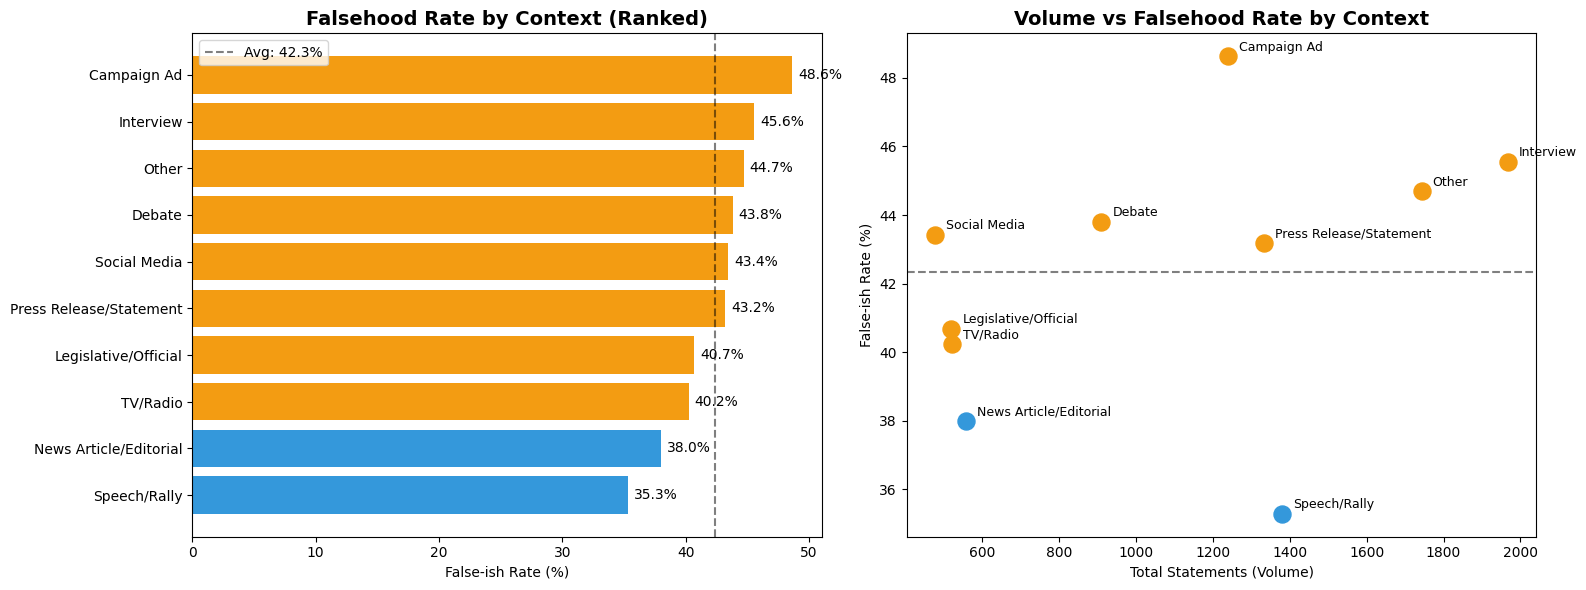

In [75]:
# Ranked bar chart: Falsehood rate by context group
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Ranked horizontal bar - false rate
ax1 = axes[0]
rate_sorted = context_false_rate.sort_values()
colors_bar = ['#e74c3c' if x > 50 else '#f39c12' if x > 40 else '#3498db' for x in rate_sorted.values]
bars = ax1.barh(range(len(rate_sorted)), rate_sorted.values, color=colors_bar)
ax1.set_yticks(range(len(rate_sorted)))
ax1.set_yticklabels(rate_sorted.index)
ax1.set_xlabel('False-ish Rate (%)')
ax1.set_title('Falsehood Rate by Context (Ranked)', fontsize=14, fontweight='bold')
ax1.axvline(x=context_false_rate.mean(), color='black', linestyle='--', alpha=0.5, label=f'Avg: {context_false_rate.mean():.1f}%')
ax1.legend()
for i, v in enumerate(rate_sorted.values):
    ax1.text(v + 0.5, i, f'{v:.1f}%', va='center', fontsize=10)

# 2. Volume vs false rate scatter
ax2 = axes[1]
for group in context_summary.index:
    row = context_summary.loc[group]
    color = '#e74c3c' if row['false_rate_%'] > 50 else '#f39c12' if row['false_rate_%'] > 40 else '#3498db'
    ax2.scatter(row['total_statements'], row['false_rate_%'], s=150, color=color, zorder=5)
    ax2.annotate(group, (row['total_statements'], row['false_rate_%']),
                 textcoords="offset points", xytext=(8, 4), fontsize=9)
ax2.set_xlabel('Total Statements (Volume)')
ax2.set_ylabel('False-ish Rate (%)')
ax2.set_title('Volume vs Falsehood Rate by Context', fontsize=14, fontweight='bold')
ax2.axhline(y=context_false_rate.mean(), color='black', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

### Speaker Level Analysis

In [78]:
# Distribution of statements per speaker
speaker_counts = combined_df_filtered.groupby('speaker').size().sort_values(ascending=False)

print(f"Total speakers: {len(speaker_counts)}")
print(f"Top 10% of speakers account for {(speaker_counts.head(len(speaker_counts)//10).sum() / speaker_counts.sum())*100}% of statements")
print(f"\nStatements per speaker stats:")
print(speaker_counts.describe().round(2))

Total speakers: 2297
Top 10% of speakers account for 64.65784286116588% of statements

Statements per speaker stats:
count    2297.00
mean        4.64
std        19.84
min         1.00
25%         1.00
50%         1.00
75%         3.00
max       611.00
dtype: float64


In [82]:
# Distribution of statements per speaker
speaker_counts = combined_df_filtered.groupby('speaker').size().sort_values(ascending=False)

print(f"Total speakers: {len(speaker_counts)}")
print(f"\nStatements per speaker stats:")
print(speaker_counts.describe().round(2))
print(f"\nTop 20 speakers:")
speaker_counts.head(20)

Total speakers: 2297

Statements per speaker stats:
count    2297.00
mean        4.64
std        19.84
min         1.00
25%         1.00
50%         1.00
75%         3.00
max       611.00
dtype: float64

Top 20 speakers:


speaker
barack-obama       611
donald-trump       343
hillary-clinton    297
mitt-romney        214
john-mccain        189
scott-walker       183
rick-perry         173
marco-rubio        153
rick-scott         150
ted-cruz           118
bernie-s           106
chris-christie     104
charlie-crist       90
newt-gingrich       83
jeb-bush            79
joe-biden           76
paul-ryan           70
john-boehner        68
john-kasich         67
sarah-palin         66
dtype: int64

In [83]:
# Do a small number of people account for most falsehoods?
speaker_labels = combined_df_filtered.groupby(['speaker', 'label']).size().unstack(fill_value=0)
speaker_totals = speaker_labels.sum(axis=1)
speaker_false_counts = speaker_labels[falseish_labels].sum(axis=1)
speaker_false_rate = (speaker_false_counts / speaker_totals * 100)

# Pareto analysis
speaker_false_sorted = speaker_false_counts.sort_values(ascending=False)
cumulative_false = speaker_false_sorted.cumsum()
total_false = speaker_false_sorted.sum()
cumulative_pct = (cumulative_false / total_false * 100)

pct_50 = (cumulative_pct <= 50).sum()
pct_80 = (cumulative_pct <= 80).sum()

print(f"Top {pct_50} speakers ({pct_50/len(speaker_false_sorted)*100:.1f}%) account for 50% of all false statements")
print(f"Top {pct_80} speakers ({pct_80/len(speaker_false_sorted)*100:.1f}%) account for 80% of all false statements")

Top 82 speakers (3.6%) account for 50% of all false statements
Top 526 speakers (22.9%) account for 80% of all false statements


In [84]:
# Repeat offender analysis - false rate per speaker (min 5 statements)
min_statements = 5
qualified = speaker_totals[speaker_totals >= min_statements].index
speaker_false_rate_q = speaker_false_rate[qualified].sort_values(ascending=False)

# Top decile offenders
top_decile_n = max(1, int(len(speaker_false_rate_q) * 0.1))
top_offenders = speaker_false_rate_q.head(top_decile_n)

top_offender_df = pd.DataFrame({
    'total_statements': speaker_totals[top_offenders.index],
    'false_count': speaker_false_counts[top_offenders.index],
    'false_rate_%': top_offenders.round(2)
}).sort_values('false_count', ascending=False)

print(f"Top decile: {top_decile_n} speakers (≥{min_statements} statements)")
print(f"Their avg false rate: {top_offenders.mean():.1f}%")
print(f"Overall avg false rate: {speaker_false_rate_q.mean():.1f}%\n")
top_offender_df.head(20)

Top decile: 35 speakers (≥5 statements)
Their avg false rate: 82.6%
Overall avg false rate: 41.5%



,total_statements,false_count,false_rate_%
speaker,,,
donald-trump,343,241,70.26
michele-bachmann,61,46,75.41
democratic-congressional-campaign-committee,34,28,82.35
terry-mcauliffe,33,23,69.70
ben-carson,28,23,82.14
national-republican-senatorial-committee,30,21,70.00
state-democratic-party-wisconsin,24,19,79.17
allen-west,26,19,73.08
chris-larson,13,12,92.31


In [96]:
# Does past behavior predict future behavior?
from scipy.stats import pearsonr

speakers_enough = speaker_totals[speaker_totals >= 6].index

first_half_rate = []
second_half_rate = []

for speaker in speakers_enough:
    rows = combined_df_filtered[combined_df_filtered['speaker'] == speaker]
    mid = len(rows) // 2
    first_false = rows.iloc[:mid]['label'].isin(falseish_labels).mean() * 100
    second_false = rows.iloc[mid:]['label'].isin(falseish_labels).mean() * 100
    first_half_rate.append(first_false)
    second_half_rate.append(second_false)

corr, p_val = pearsonr(first_half_rate, second_half_rate)
print(f"Pearson r = {corr:.3f}, p = {p_val:.6f}")
print(f"Speakers with 6+ statements: {len(speakers_enough)}")

Pearson r = 0.294, p = 0.000000
Speakers with 6+ statements: 300


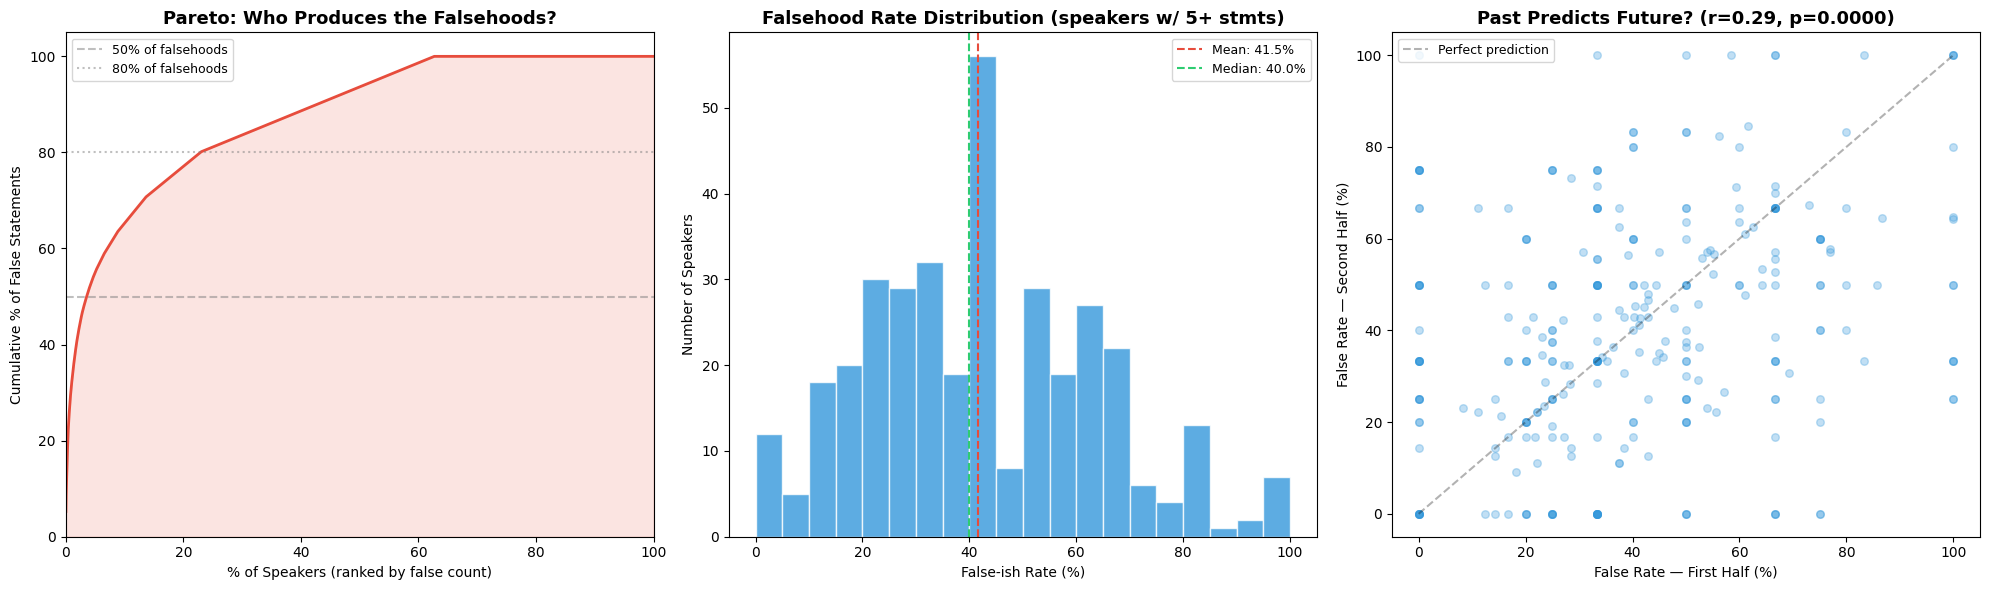

In [97]:
# Visuals: Pareto + Histogram + Prediction scatter
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# 1. Pareto chart
ax1 = axes[0]
speaker_rank_pct = np.arange(1, len(cumulative_pct) + 1) / len(cumulative_pct) * 100
ax1.plot(speaker_rank_pct, cumulative_pct.values, color='#e74c3c', linewidth=2)
ax1.fill_between(speaker_rank_pct, cumulative_pct.values, alpha=0.15, color='#e74c3c')
ax1.axhline(y=50, color='gray', linestyle='--', alpha=0.5, label='50% of falsehoods')
ax1.axhline(y=80, color='gray', linestyle=':', alpha=0.5, label='80% of falsehoods')
ax1.set_xlabel('% of Speakers (ranked by false count)')
ax1.set_ylabel('Cumulative % of False Statements')
ax1.set_title('Pareto: Who Produces the Falsehoods?', fontsize=13, fontweight='bold')
ax1.legend(fontsize=9)
ax1.set_xlim(0, 100)
ax1.set_ylim(0, 105)

# 2. Histogram of false rates
ax2 = axes[1]
ax2.hist(speaker_false_rate_q.values, bins=20, color='#3498db', edgecolor='white', alpha=0.8)
ax2.axvline(x=speaker_false_rate_q.mean(), color='#e74c3c', linestyle='--',
            label=f'Mean: {speaker_false_rate_q.mean():.1f}%')
ax2.axvline(x=speaker_false_rate_q.median(), color='#2ecc71', linestyle='--',
            label=f'Median: {speaker_false_rate_q.median():.1f}%')
ax2.set_xlabel('False-ish Rate (%)')
ax2.set_ylabel('Number of Speakers')
ax2.set_title(f'Falsehood Rate Distribution (speakers w/ {min_statements}+ stmts)', fontsize=13, fontweight='bold')
ax2.legend(fontsize=9)

# 3. Past vs future scatter
ax3 = axes[2]
ax3.scatter(first_half_rate, second_half_rate, alpha=0.3, s=30, color='#3498db')
ax3.plot([0, 100], [0, 100], 'k--', alpha=0.3, label='Perfect prediction')
ax3.set_xlabel('False Rate — First Half (%)')
ax3.set_ylabel('False Rate — Second Half (%)')
ax3.set_title(f'Past Predicts Future? (r={corr:.2f}, p={p_val:.4f})', fontsize=13, fontweight='bold')
ax3.legend(fontsize=9)

plt.tight_layout()
plt.show()

In [99]:
### Linguistic / Text Characteristics

In [100]:
import re
from textblob import TextBlob

# --- Text feature engineering ---
df = combined_df_filtered.copy()
df['statement'] = df['statement'].fillna('').astype(str)

# Binary label
df['binary_label'] = df['label'].map(binary_map)

# Length features
df['char_len'] = df['statement'].str.len()
df['word_count'] = df['statement'].str.split().str.len()

# Sentiment (polarity + subjectivity)
df['polarity'] = df['statement'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['statement'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Certainty language: "always", "never", "everyone", "no one", "every", "absolutely", "definitely", "all"
certainty_pattern = r'\b(always|never|everyone|no one|every|absolutely|definitely|all|nothing|nobody|certainly)\b'
df['certainty_count'] = df['statement'].str.lower().str.count(certainty_pattern)
df['has_certainty'] = (df['certainty_count'] > 0).astype(int)

# Modality: "might", "could", "may", "perhaps", "possibly", "probably", "likely"
modality_pattern = r'\b(might|could|may|perhaps|possibly|probably|likely|unlikely|suggest|appear)\b'
df['modality_count'] = df['statement'].str.lower().str.count(modality_pattern)
df['has_modality'] = (df['modality_count'] > 0).astype(int)

# Numeric claims (any digit sequence)
df['numeric_count'] = df['statement'].apply(lambda x: len(re.findall(r'\b\d[\d,.%$]*\b', x)))
df['has_numeric'] = (df['numeric_count'] > 0).astype(int)

# Emotional tone markers
df['exclamation_count'] = df['statement'].str.count('!')
df['question_count'] = df['statement'].str.count(r'\?')
df['caps_word_count'] = df['statement'].apply(lambda x: sum(1 for w in x.split() if w.isupper() and len(w) > 1))

print(f"Features engineered for {len(df)} statements")
df[['statement', 'binary_label', 'char_len', 'word_count', 'polarity', 'subjectivity',
    'certainty_count', 'modality_count', 'numeric_count', 'exclamation_count']].head()

Features engineered for 10655 statements


,statement,binary_label,char_len,word_count,polarity,subjectivity,certainty_count,modality_count,numeric_count,exclamation_count
0,Says the Annies List political group supports ...,false,82,11,0.0,0.100000,0,0,0,0
1,When did the decline of coal start? It started...,true,141,24,0.1,0.400000,0,0,0,0
2,"Hillary Clinton agrees with John McCain ""by vo...",true,105,19,0.0,0.000000,0,0,0,0
4,The economic turnaround started at the end of ...,true,54,10,0.2,0.200000,0,0,0,0
5,The Chicago Bears have had more starting quart...,true,155,27,0.1,0.296667,0,0,1,0


In [101]:
# Average length (chars + words) for false vs true statements
from scipy.stats import mannwhitneyu

length_comparison = df.groupby('binary_label')[['char_len', 'word_count']].agg(['mean', 'median', 'std']).round(2)
print("=== Statement Length: False vs True ===\n")
print(length_comparison)

# Statistical test
for feat in ['char_len', 'word_count']:
    true_vals = df[df['binary_label'] == 'true'][feat]
    false_vals = df[df['binary_label'] == 'false'][feat]
    stat, p = mannwhitneyu(true_vals, false_vals, alternative='two-sided')
    direction = "longer" if true_vals.mean() > false_vals.mean() else "shorter"
    sig = "✓ significant" if p < 0.05 else "✗ not significant"
    print(f"\n{feat}: True statements are {direction} (U={stat:.0f}, p={p:.6f}, {sig})")

=== Statement Length: False vs True ===

             char_len               word_count              
                 mean median    std       mean median    std
binary_label                                                
false          103.35   95.0  53.75      17.34   16.0   8.83
true           109.48  101.0  63.29      18.55   17.0  10.15

char_len: True statements are longer (U=14981385, p=0.000000, ✓ significant)

word_count: True statements are longer (U=15155426, p=0.000000, ✓ significant)


In [102]:
# Certainty language, modality, numeric claims, emotional tone — false vs true
linguistic_features = ['certainty_count', 'has_certainty', 'modality_count', 'has_modality',
                       'numeric_count', 'has_numeric', 'exclamation_count', 'question_count', 'caps_word_count']

ling_comparison = df.groupby('binary_label')[linguistic_features].mean().T.round(4)
ling_comparison.columns = ['false_avg', 'true_avg']
ling_comparison['diff_%'] = ((ling_comparison['false_avg'] - ling_comparison['true_avg']) / ling_comparison['true_avg'] * 100).round(1)

print("=== Linguistic Markers: False vs True (mean per statement) ===\n")
print(ling_comparison.to_string())

# Statistical significance for each feature
print("\n\n=== Statistical Tests (Mann-Whitney U) ===\n")
for feat in linguistic_features:
    true_vals = df[df['binary_label'] == 'true'][feat]
    false_vals = df[df['binary_label'] == 'false'][feat]
    stat, p = mannwhitneyu(true_vals, false_vals, alternative='two-sided')
    sig = "✓" if p < 0.05 else "✗"
    higher = "FALSE" if false_vals.mean() > true_vals.mean() else "TRUE"
    print(f"{feat:20s} → higher in {higher:5s}  p={p:.6f} {sig}")

=== Linguistic Markers: False vs True (mean per statement) ===

                   false_avg  true_avg  diff_%
certainty_count       0.1050    0.1083    -3.0
has_certainty         0.0982    0.1014    -3.2
modality_count        0.0284    0.0245    15.9
has_modality          0.0273    0.0231    18.2
numeric_count         0.4537    0.6537   -30.6
has_numeric           0.3186    0.4288   -25.7
exclamation_count     0.0052    0.0041    26.8
question_count        0.0081    0.0063    28.6
caps_word_count       0.1292    0.1261     2.5


=== Statistical Tests (Mann-Whitney U) ===

certainty_count      → higher in TRUE   p=0.580424 ✗
has_certainty        → higher in TRUE   p=0.583185 ✗
modality_count       → higher in FALSE  p=0.166894 ✗
has_modality         → higher in FALSE  p=0.165354 ✗
numeric_count        → higher in TRUE   p=0.000000 ✓
has_numeric          → higher in TRUE   p=0.000000 ✓
exclamation_count    → higher in FALSE  p=0.213614 ✗
question_count       → higher in FALSE  p=0.09529

In [103]:
# Sentiment differences (polarity + subjectivity) — false vs true
sentiment_comparison = df.groupby('binary_label')[['polarity', 'subjectivity']].agg(['mean', 'median', 'std']).round(4)
print("=== Sentiment: False vs True ===\n")
print(sentiment_comparison)

# Also check across all 6 labels
sentiment_by_label = df.groupby('label')[['polarity', 'subjectivity']].mean().round(4)
sentiment_by_label = sentiment_by_label.reindex(['pants-fire', 'FALSE', 'barely-true', 'half-true', 'mostly-true', 'TRUE'])
print("\n\n=== Sentiment by 6-class label (ordered low → high truth) ===\n")
print(sentiment_by_label)

# Statistical tests
print("\n\n=== Statistical Tests ===\n")
for feat in ['polarity', 'subjectivity']:
    true_vals = df[df['binary_label'] == 'true'][feat]
    false_vals = df[df['binary_label'] == 'false'][feat]
    stat, p = mannwhitneyu(true_vals, false_vals, alternative='two-sided')
    sig = "✓ significant" if p < 0.05 else "✗ not significant"
    higher = "FALSE" if false_vals.mean() > true_vals.mean() else "TRUE"
    print(f"{feat:15s} → higher in {higher:5s}  p={p:.6f} {sig}")

# Correlation between truth score and sentiment
from scipy.stats import spearmanr
for feat in ['polarity', 'subjectivity']:
    r, p = spearmanr(df['truth_score'], df[feat])
    print(f"\n{feat} ↔ truth_score: Spearman r={r:.4f}, p={p:.6f}")

=== Sentiment: False vs True ===

             polarity                subjectivity                
                 mean median     std         mean  median     std
binary_label                                                     
false          0.0414    0.0  0.2067       0.2517  0.1778  0.2755
true           0.0557    0.0  0.2168       0.2746  0.2500  0.2719


=== Sentiment by 6-class label (ordered low → high truth) ===

             polarity  subjectivity
label                              
pants-fire     0.0242        0.2461
FALSE          0.0431        0.2462
barely-true    0.0462        0.2602
half-true      0.0581        0.2687
mostly-true    0.0491        0.2796
TRUE           0.0604        0.2760


=== Statistical Tests ===

polarity        → higher in TRUE   p=0.001173 ✓ significant
subjectivity    → higher in TRUE   p=0.000001 ✓ significant

polarity ↔ truth_score: Spearman r=0.0348, p=0.000334

subjectivity ↔ truth_score: Spearman r=0.0509, p=0.000000


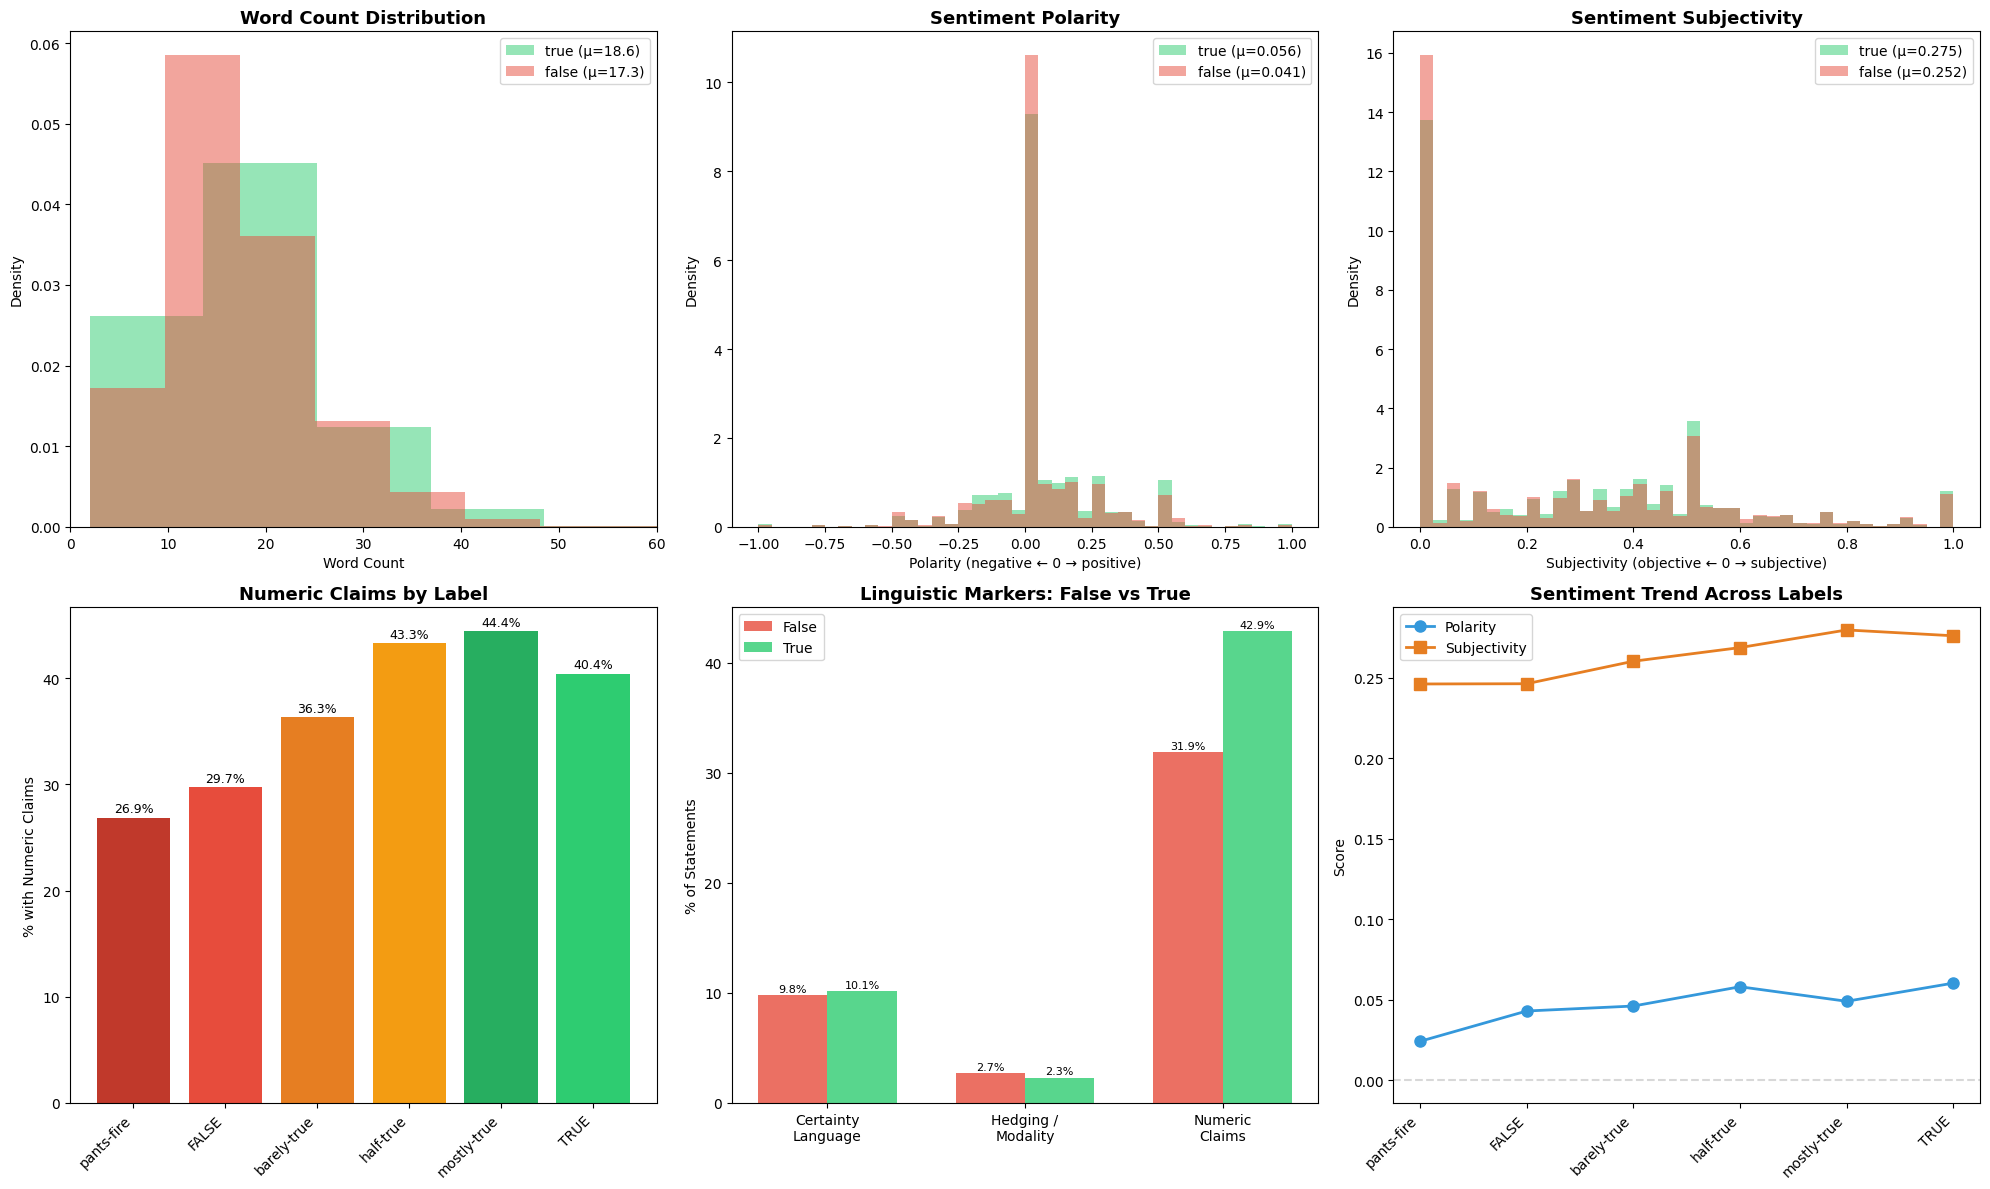

In [104]:
# Visuals: Linguistic / Text Characteristics
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# 1. Word count distribution by binary label
ax1 = axes[0, 0]
for label, color in [('true', '#2ecc71'), ('false', '#e74c3c')]:
    subset = df[df['binary_label'] == label]['word_count']
    ax1.hist(subset, bins=40, alpha=0.5, color=color, label=f'{label} (μ={subset.mean():.1f})', density=True)
ax1.set_xlabel('Word Count')
ax1.set_ylabel('Density')
ax1.set_title('Word Count Distribution', fontsize=13, fontweight='bold')
ax1.legend()
ax1.set_xlim(0, 60)

# 2. Polarity distribution
ax2 = axes[0, 1]
for label, color in [('true', '#2ecc71'), ('false', '#e74c3c')]:
    subset = df[df['binary_label'] == label]['polarity']
    ax2.hist(subset, bins=40, alpha=0.5, color=color, label=f'{label} (μ={subset.mean():.3f})', density=True)
ax2.set_xlabel('Polarity (negative ← 0 → positive)')
ax2.set_ylabel('Density')
ax2.set_title('Sentiment Polarity', fontsize=13, fontweight='bold')
ax2.legend()

# 3. Subjectivity distribution
ax3 = axes[0, 2]
for label, color in [('true', '#2ecc71'), ('false', '#e74c3c')]:
    subset = df[df['binary_label'] == label]['subjectivity']
    ax3.hist(subset, bins=40, alpha=0.5, color=color, label=f'{label} (μ={subset.mean():.3f})', density=True)
ax3.set_xlabel('Subjectivity (objective ← 0 → subjective)')
ax3.set_ylabel('Density')
ax3.set_title('Sentiment Subjectivity', fontsize=13, fontweight='bold')
ax3.legend()

# 4. Numeric claims rate (% of statements containing numbers)
ax4 = axes[1, 0]
numeric_rate = df.groupby('label')['has_numeric'].mean().reindex(
    ['pants-fire', 'FALSE', 'barely-true', 'half-true', 'mostly-true', 'TRUE']) * 100
colors_6 = ['#c0392b', '#e74c3c', '#e67e22', '#f39c12', '#27ae60', '#2ecc71']
ax4.bar(range(len(numeric_rate)), numeric_rate.values, color=colors_6)
ax4.set_xticks(range(len(numeric_rate)))
ax4.set_xticklabels(numeric_rate.index, rotation=45, ha='right')
ax4.set_ylabel('% with Numeric Claims')
ax4.set_title('Numeric Claims by Label', fontsize=13, fontweight='bold')
for i, v in enumerate(numeric_rate.values):
    ax4.text(i, v + 0.5, f'{v:.1f}%', ha='center', fontsize=9)

# 5. Linguistic markers grouped bar chart
ax5 = axes[1, 1]
markers = ['has_certainty', 'has_modality', 'has_numeric']
marker_labels = ['Certainty\nLanguage', 'Hedging /\nModality', 'Numeric\nClaims']
false_rates = [df[df['binary_label'] == 'false'][m].mean() * 100 for m in markers]
true_rates = [df[df['binary_label'] == 'true'][m].mean() * 100 for m in markers]
x = np.arange(len(markers))
w = 0.35
ax5.bar(x - w/2, false_rates, w, label='False', color='#e74c3c', alpha=0.8)
ax5.bar(x + w/2, true_rates, w, label='True', color='#2ecc71', alpha=0.8)
ax5.set_xticks(x)
ax5.set_xticklabels(marker_labels)
ax5.set_ylabel('% of Statements')
ax5.set_title('Linguistic Markers: False vs True', fontsize=13, fontweight='bold')
ax5.legend()
for i, (fv, tv) in enumerate(zip(false_rates, true_rates)):
    ax5.text(i - w/2, fv + 0.3, f'{fv:.1f}%', ha='center', fontsize=8)
    ax5.text(i + w/2, tv + 0.3, f'{tv:.1f}%', ha='center', fontsize=8)

# 6. Sentiment across 6 labels (mean polarity + subjectivity)
ax6 = axes[1, 2]
label_order = ['pants-fire', 'FALSE', 'barely-true', 'half-true', 'mostly-true', 'TRUE']
pol_by_label = df.groupby('label')['polarity'].mean().reindex(label_order)
sub_by_label = df.groupby('label')['subjectivity'].mean().reindex(label_order)
x6 = np.arange(len(label_order))
ax6.plot(x6, pol_by_label.values, 'o-', color='#3498db', label='Polarity', linewidth=2, markersize=8)
ax6.plot(x6, sub_by_label.values, 's-', color='#e67e22', label='Subjectivity', linewidth=2, markersize=8)
ax6.set_xticks(x6)
ax6.set_xticklabels(label_order, rotation=45, ha='right')
ax6.set_ylabel('Score')
ax6.set_title('Sentiment Trend Across Labels', fontsize=13, fontweight='bold')
ax6.legend()
ax6.axhline(y=0, color='gray', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

## Linguistic / Text Characteristics — Policy Implications

### Key Findings:

| Feature | Result | Significant? |
|---|---|---|
| **Statement length** | True statements are ~6% longer (18.6 vs 17.3 words) | ✓ Yes |
| **Numeric claims** | True statements use numbers **35% more often** (42.9% vs 31.9%) | ✓ Yes |
| **Sentiment polarity** | False statements are slightly more neutral / less positive | ✓ Yes |
| **Subjectivity** | False statements are more objective-sounding | ✓ Yes |
| **Certainty language** | No significant difference (~10% both groups) | ✗ No |
| **Hedging / modality** | No significant difference (~2.5% both groups) | ✗ No |
| **Exclamation marks / ALL CAPS** | No significant difference | ✗ No |

In [ ]:
### Interaction Effects (Party × Context × Speaker)

In [105]:
# --- Party × Context: Are falsehoods higher on social media for all parties equally? ---
top_parties_list = ['republican', 'democrat']  # focus on the two main parties for clean comparison
df_inter = combined_df_filtered.copy()

# Falsehood rate by party × context_group
party_context = df_inter.groupby(['party', 'context_group']).apply(
    lambda g: pd.Series({
        'total': len(g),
        'false_count': g['label'].isin(falseish_labels).sum(),
        'false_rate_%': g['label'].isin(falseish_labels).mean() * 100
    })
).reset_index()

# Filter to top 2 parties and context groups with ≥20 statements per cell
party_context_top = party_context[party_context['party'].isin(top_parties_list)]
party_context_top = party_context_top[party_context_top['total'] >= 20]

# Pivot for display
pivot_rate = party_context_top.pivot(index='context_group', columns='party', values='false_rate_%').round(1)
pivot_count = party_context_top.pivot(index='context_group', columns='party', values='total').astype(int)
pivot_rate['gap (R−D)'] = (pivot_rate.get('republican', 0) - pivot_rate.get('democrat', 0)).round(1)
pivot_rate = pivot_rate.sort_values('gap (R−D)', ascending=False)

print("=== Falsehood Rate (%) by Party × Context ===")
print(f"(min 20 statements per cell)\n")
print(pivot_rate.to_string())

# Are falsehoods higher on social media for all parties equally?
sm = party_context_top[party_context_top['context_group'] == 'Social Media']
if len(sm) >= 2:
    rep_sm = sm[sm['party'] == 'republican']['false_rate_%'].values
    dem_sm = sm[sm['party'] == 'democrat']['false_rate_%'].values
    if len(rep_sm) > 0 and len(dem_sm) > 0:
        print(f"\n\n📱 Social Media specifically:")
        print(f"  Republican false rate: {rep_sm[0]:.1f}%")
        print(f"  Democrat false rate:   {dem_sm[0]:.1f}%")
        print(f"  Gap: {rep_sm[0] - dem_sm[0]:+.1f} pp")
        print(f"  → {'Party affects social media falsehood rate' if abs(rep_sm[0] - dem_sm[0]) > 5 else 'Similar rates on social media'}")

=== Falsehood Rate (%) by Party × Context ===
(min 20 statements per cell)

party                    democrat  republican  gap (R−D)
context_group                                           
Speech/Rally                 22.6        47.4       24.8
Debate                       30.4        51.4       21.0
TV/Radio                     29.9        50.6       20.7
Social Media                 31.1        49.8       18.7
Interview                    37.0        51.4       14.4
Press Release/Statement      36.2        49.9       13.7
Campaign Ad                  40.7        53.9       13.2
News Article/Editorial       29.9        42.2       12.3
Legislative/Official         35.0        45.7       10.7
Other                        39.4        49.3        9.9


📱 Social Media specifically:
  Republican false rate: 49.8%
  Democrat false rate:   31.1%
  Gap: +18.7 pp
  → Party affects social media falsehood rate


In [106]:
# --- Context × Speaker History: Do repeat offenders behave differently across platforms? ---

# Tag each speaker as "repeat offender" or not (top decile by false count, min 5 statements)
speaker_labels_df = df_inter.groupby(['speaker', 'label']).size().unstack(fill_value=0)
sp_totals = speaker_labels_df.sum(axis=1)
sp_false = speaker_labels_df[falseish_labels].sum(axis=1)
sp_false_rate = (sp_false / sp_totals * 100)

qualified_sp = sp_totals[sp_totals >= 5].index
sp_false_rate_q = sp_false_rate[qualified_sp].sort_values(ascending=False)
top_decile_cutoff_val = int(len(sp_false_rate_q) * 0.1)
top_offender_names = sp_false_rate_q.head(top_decile_cutoff_val).index

df_inter['is_repeat_offender'] = df_inter['speaker'].isin(top_offender_names).map({True: 'Repeat Offender', False: 'Regular Speaker'})

# False rate by context × offender status
ctx_offender = df_inter.groupby(['context_group', 'is_repeat_offender']).apply(
    lambda g: pd.Series({
        'total': len(g),
        'false_rate_%': g['label'].isin(falseish_labels).mean() * 100
    })
).reset_index()

ctx_offender_pivot = ctx_offender.pivot(index='context_group', columns='is_repeat_offender', values='false_rate_%').round(1)
ctx_offender_count = ctx_offender.pivot(index='context_group', columns='is_repeat_offender', values='total').fillna(0).astype(int)

ctx_offender_pivot['gap (Offender − Regular)'] = (
    ctx_offender_pivot.get('Repeat Offender', 0) - ctx_offender_pivot.get('Regular Speaker', 0)
).round(1)
ctx_offender_pivot = ctx_offender_pivot.sort_values('gap (Offender − Regular)', ascending=False)

print("=== False Rate by Context × Speaker History ===\n")
print(ctx_offender_pivot.to_string())

# Verdict
avg_gap = ctx_offender_pivot['gap (Offender − Regular)'].mean()
print(f"\nAvg gap across contexts: {avg_gap:+.1f} pp")
print(f"→ Repeat offenders are {'consistently worse' if avg_gap > 10 else 'somewhat worse'} across ALL platforms")

=== False Rate by Context × Speaker History ===

is_repeat_offender       Regular Speaker  Repeat Offender  gap (Offender − Regular)
context_group                                                                      
Press Release/Statement             40.6             82.1                      41.5
Speech/Rally                        30.6             68.4                      37.8
Interview                           42.6             79.4                      36.8
TV/Radio                            37.8             74.3                      36.5
Other                               43.2             78.4                      35.2
Legislative/Official                39.9             75.0                      35.1
Social Media                        39.9             74.0                      34.1
Debate                              40.3             72.7                      32.4
Campaign Ad                         46.9             77.5                      30.6
News Article/Editorial     

In [107]:
# --- Party × Platform effects: Do some platforms amplify partisan differences? ---
# Use chi-squared test for independence: within each context, is party independent of falsehood?
from scipy.stats import chi2_contingency

print("=== Chi-squared: Is party × falsehood independent within each context? ===\n")
df_inter['is_false'] = df_inter['label'].isin(falseish_labels).astype(int)
df_2party = df_inter[df_inter['party'].isin(top_parties_list)]

results = []
for ctx in sorted(df_2party['context_group'].unique()):
    sub = df_2party[df_2party['context_group'] == ctx]
    ct = pd.crosstab(sub['party'], sub['is_false'])
    if ct.shape == (2, 2) and ct.min().min() >= 5:
        chi2, p, dof, expected = chi2_contingency(ct)
        rep_rate = sub[sub['party'] == 'republican']['is_false'].mean() * 100
        dem_rate = sub[sub['party'] == 'democrat']['is_false'].mean() * 100
        results.append({
            'context': ctx,
            'n': len(sub),
            'rep_false_%': round(rep_rate, 1),
            'dem_false_%': round(dem_rate, 1),
            'gap_pp': round(rep_rate - dem_rate, 1),
            'chi2': round(chi2, 2),
            'p_value': round(p, 6),
            'significant': '✓' if p < 0.05 else '✗'
        })

results_df = pd.DataFrame(results).sort_values('gap_pp', ascending=False)
print(results_df.to_string(index=False))

sig_count = (results_df['significant'] == '✓').sum()
print(f"\n{sig_count} / {len(results_df)} contexts show statistically significant party differences")
print(f"→ {'Party effect is robust across platforms' if sig_count > len(results_df) // 2 else 'Party effect is context-dependent'}")

=== Chi-squared: Is party × falsehood independent within each context? ===

                context    n  rep_false_%  dem_false_%  gap_pp  chi2  p_value significant
           Speech/Rally 1345         47.4         22.6    24.9 89.55 0.000000           ✓
                 Debate  873         51.4         30.4    21.0 34.88 0.000000           ✓
               TV/Radio  407         50.6         29.9    20.8 16.81 0.000041           ✓
           Social Media  428         49.8         31.1    18.7 13.16 0.000285           ✓
              Interview 1853         51.4         37.0    14.5 36.07 0.000000           ✓
Press Release/Statement 1250         49.9         36.2    13.6 22.85 0.000002           ✓
            Campaign Ad 1131         53.9         40.7    13.2 18.90 0.000014           ✓
 News Article/Editorial  480         42.2         29.9    12.3  6.60 0.010204           ✓
   Legislative/Official  490         45.7         35.0    10.8  5.46 0.019444           ✓
                  Other 

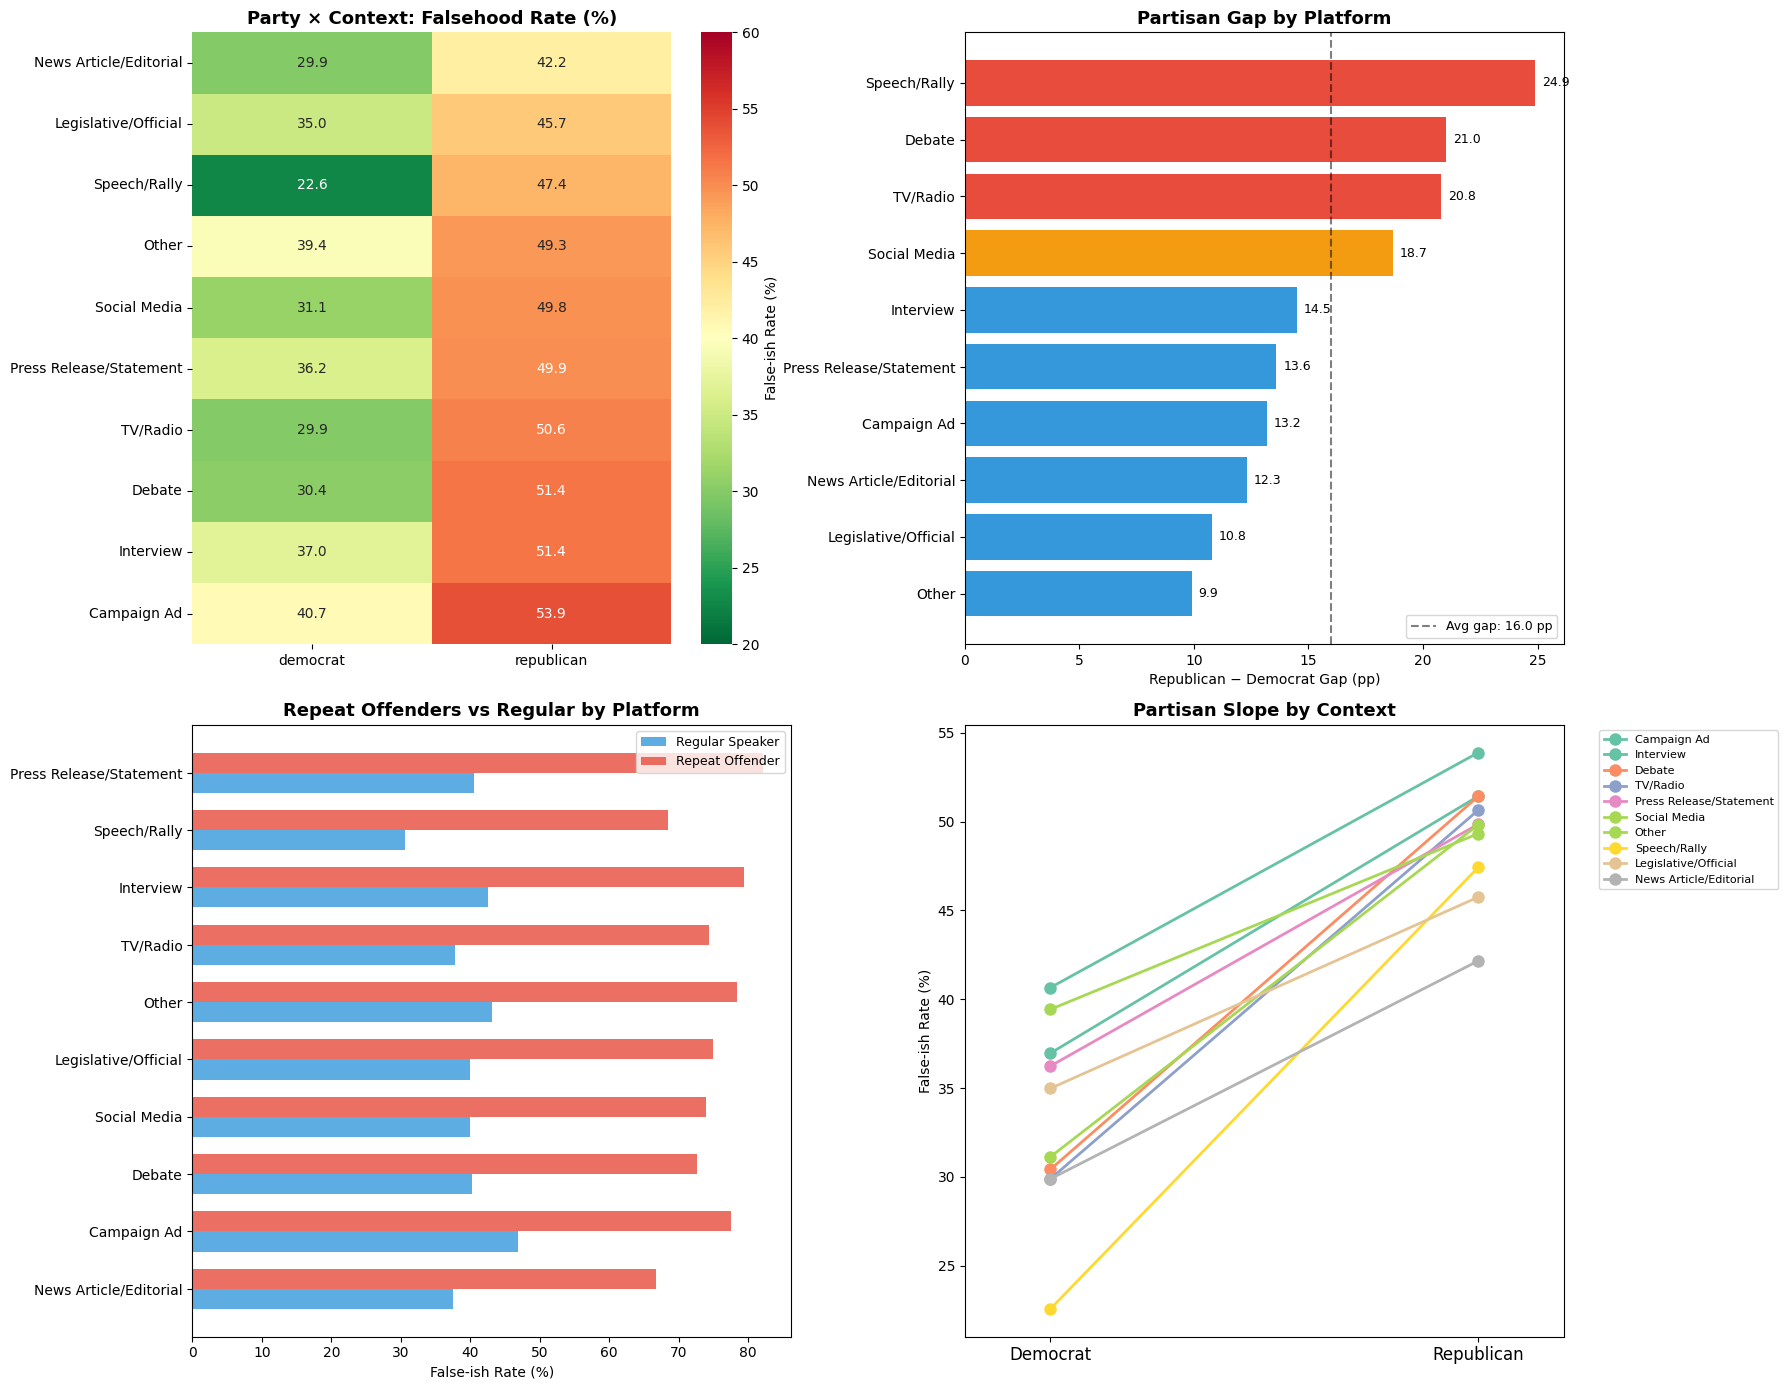

In [108]:
# Visuals: Interaction Effects
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# 1. Heatmap: Party × Context false rate
ax1 = axes[0, 0]
# Build full heatmap for top 2 parties
heatmap_data = party_context_top.pivot(index='context_group', columns='party', values='false_rate_%')
heatmap_data = heatmap_data.reindex(columns=['democrat', 'republican'])
heatmap_data = heatmap_data.sort_values('republican', ascending=True)
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='RdYlGn_r', ax=ax1,
            vmin=20, vmax=60, cbar_kws={'label': 'False-ish Rate (%)'})
ax1.set_title('Party × Context: Falsehood Rate (%)', fontsize=13, fontweight='bold')
ax1.set_ylabel('')
ax1.set_xlabel('')

# 2. Grouped bar: Party × Context gap
ax2 = axes[0, 1]
gap_data = results_df.sort_values('gap_pp', ascending=True)
colors_gap = ['#e74c3c' if g > 20 else '#f39c12' if g > 15 else '#3498db' for g in gap_data['gap_pp']]
ax2.barh(range(len(gap_data)), gap_data['gap_pp'], color=colors_gap)
ax2.set_yticks(range(len(gap_data)))
ax2.set_yticklabels(gap_data['context'])
ax2.set_xlabel('Republican − Democrat Gap (pp)')
ax2.set_title('Partisan Gap by Platform', fontsize=13, fontweight='bold')
ax2.axvline(x=gap_data['gap_pp'].mean(), color='black', linestyle='--', alpha=0.5,
            label=f"Avg gap: {gap_data['gap_pp'].mean():.1f} pp")
ax2.legend(fontsize=9)
for i, v in enumerate(gap_data['gap_pp']):
    ax2.text(v + 0.3, i, f'{v:.1f}', va='center', fontsize=9)

# 3. Context × Speaker offender status (grouped bar)
ax3 = axes[1, 0]
ctx_order = ctx_offender_pivot.sort_values('gap (Offender − Regular)').index
reg_vals = ctx_offender_pivot.loc[ctx_order, 'Regular Speaker']
off_vals = ctx_offender_pivot.loc[ctx_order, 'Repeat Offender']
y = np.arange(len(ctx_order))
h = 0.35
ax3.barh(y - h/2, reg_vals, h, label='Regular Speaker', color='#3498db', alpha=0.8)
ax3.barh(y + h/2, off_vals, h, label='Repeat Offender', color='#e74c3c', alpha=0.8)
ax3.set_yticks(y)
ax3.set_yticklabels(ctx_order)
ax3.set_xlabel('False-ish Rate (%)')
ax3.set_title('Repeat Offenders vs Regular by Platform', fontsize=13, fontweight='bold')
ax3.legend(fontsize=9)

# 4. Slope chart: Dem vs Rep across contexts
ax4 = axes[1, 1]
ctx_sorted = heatmap_data.sort_values('republican', ascending=False).index
for i, ctx in enumerate(ctx_sorted):
    dem_val = heatmap_data.loc[ctx, 'democrat']
    rep_val = heatmap_data.loc[ctx, 'republican']
    ax4.plot([0, 1], [dem_val, rep_val], 'o-', color=plt.cm.Set2(i / len(ctx_sorted)),
             linewidth=2, markersize=8, label=ctx)
ax4.set_xticks([0, 1])
ax4.set_xticklabels(['Democrat', 'Republican'], fontsize=12)
ax4.set_ylabel('False-ish Rate (%)')
ax4.set_title('Partisan Slope by Context', fontsize=13, fontweight='bold')
ax4.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
ax4.set_xlim(-0.2, 1.2)

plt.tight_layout()
plt.show()

## Interaction Effects — Policy Implications

### Key Findings:

**1. Party × Context: The partisan gap is NOT uniform across platforms**
- **Largest gap**: Speeches/Rallies (+24.9 pp), Debates (+21.0 pp), TV/Radio (+20.8 pp)
- **Smallest gap**: Legislative/Official (+10.8 pp), Other (+9.9 pp)
- All 10 contexts show **statistically significant** partisan differences (χ² tests, all p < 0.05)
- Social Media specifically: Republicans 49.8% vs Democrats 31.1% (+18.7 pp gap)

**2. Context × Speaker History: Repeat offenders are worse EVERYWHERE**
- Average gap: **+34.9 pp** higher falsehood rate for repeat offenders vs regular speakers
- Consistent across all 10 platforms (29–42 pp range)
- Worst gap: Press Releases (+41.5 pp) — offenders weaponize official-sounding channels

**3. Party × Platform: Some platforms amplify partisan differences**
- Live/unscripted settings (speeches, debates, TV) show the **largest partisan gaps**
- Formal/written contexts (legislative, news articles) show **smaller gaps**
- This suggests real-time settings may be more susceptible to misinformation — or are more aggressively fact-checked

### Policy Implications:

1. **Platform-specific moderation**: One-size-fits-all content moderation is insufficient. Speeches/rallies need different intervention than news articles.

2. **Repeat offenders are the highest-leverage target**: A speaker-based flagging system would be effective across ALL platforms — the +35 pp gap is remarkably consistent.

3. **Live settings amplify partisan differences**: Real-time fact-checking at debates and rallies could disproportionately reduce the overall misinformation rate.

4. **Social media is NOT uniquely bad**: The 18.7 pp partisan gap on social media is actually *below average* (16.0 pp mean). Speeches and debates are where the largest disparities occur.

### Caveat:
- These interactions reflect **fact-checker selection**, not the universe of all statements
- Partisan gaps may partly reflect differential scrutiny, not just differential behavior
- Small cell sizes in some party × context combinations reduce statistical power

### Bias & Fairness Checks

In [109]:
# --- Is the dataset over-representing certain politicians? ---
bf = combined_df_filtered.copy()

# Top 20 most fact-checked speakers
top_speakers = bf.groupby('speaker').size().sort_values(ascending=False).head(20)
top_speakers_pct = (top_speakers / len(bf) * 100).round(2)

# Concentration metrics
total_speakers = bf['speaker'].nunique()
top_10_share = top_speakers.head(10).sum() / len(bf) * 100
top_20_share = top_speakers.sum() / len(bf) * 100

print("=== Speaker Over-Representation ===\n")
print(f"Total unique speakers: {total_speakers}")
print(f"Top 10 speakers account for: {top_10_share:.1f}% of all statements")
print(f"Top 20 speakers account for: {top_20_share:.1f}% of all statements")
print(f"\nConcentration ratio (top 20 / total speakers): {20/total_speakers*100:.2f}%")
print(f"→ {20/total_speakers*100:.2f}% of speakers produce {top_20_share:.1f}% of fact-checked statements\n")

# Show top 20 with their party and false rate
top_speaker_details = []
for sp in top_speakers.index:
    sp_rows = bf[bf['speaker'] == sp]
    false_rate = sp_rows['label'].isin(falseish_labels).mean() * 100
    party = sp_rows['party'].mode().iloc[0] if len(sp_rows) > 0 else 'unknown'
    top_speaker_details.append({
        'speaker': sp,
        'party': party,
        'n_statements': len(sp_rows),
        'pct_of_dataset': round(len(sp_rows) / len(bf) * 100, 2),
        'false_rate_%': round(false_rate, 1)
    })

top_speaker_df = pd.DataFrame(top_speaker_details)
print("Top 20 Most Fact-Checked Speakers:")
top_speaker_df

=== Speaker Over-Representation ===

Total unique speakers: 2297
Top 10 speakers account for: 22.8% of all statements
Top 20 speakers account for: 30.4% of all statements

Concentration ratio (top 20 / total speakers): 0.87%
→ 0.87% of speakers produce 30.4% of fact-checked statements

Top 20 Most Fact-Checked Speakers:


,speaker,party,n_statements,pct_of_dataset,false_rate_%
0,barack-obama,democrat,611,5.73,26.2
1,donald-trump,republican,343,3.22,70.3
2,hillary-clinton,democrat,297,2.79,26.6
3,mitt-romney,republican,214,2.01,41.6
4,john-mccain,republican,189,1.77,42.9
5,scott-walker,republican,183,1.72,45.4
6,rick-perry,republican,173,1.62,46.2
7,marco-rubio,republican,153,1.44,41.8
8,rick-scott,republican,150,1.41,42.0
9,ted-cruz,republican,118,1.11,65.3


In [110]:
# --- Are certain parties fact-checked more often? (Selection bias) ---
from scipy.stats import chi2_contingency

# Party representation in dataset vs what we might expect
party_stmt_counts = bf['party'].value_counts()
party_stmt_pct = (party_stmt_counts / len(bf) * 100).round(2)

print("=== Fact-Check Frequency by Party ===\n")
print("Party representation in dataset:")
print(party_stmt_pct.head(10).to_string())

# Ratio of Republican to Democrat statements
rep_n = party_stmt_counts.get('republican', 0)
dem_n = party_stmt_counts.get('democrat', 0)
ratio = rep_n / dem_n if dem_n > 0 else float('inf')
print(f"\nRepublican statements: {rep_n} ({rep_n/len(bf)*100:.1f}%)")
print(f"Democrat statements:   {dem_n} ({dem_n/len(bf)*100:.1f}%)")
print(f"R/D ratio: {ratio:.2f}")
print(f"→ {'Republicans are fact-checked more' if ratio > 1.1 else 'Democrats are fact-checked more' if ratio < 0.9 else 'Roughly equal fact-checking'}")

# Per-speaker fact-check intensity by party (avg statements per speaker)
party_speaker_intensity = bf.groupby('party').apply(
    lambda g: pd.Series({
        'n_speakers': g['speaker'].nunique(),
        'n_statements': len(g),
        'stmts_per_speaker': len(g) / g['speaker'].nunique()
    })
).sort_values('stmts_per_speaker', ascending=False)

print(f"\n\n=== Fact-Check Intensity (statements per speaker) ===\n")
print(party_speaker_intensity.head(10).round(2).to_string())

# Chi-squared: is party independent of being false?
ct_party = pd.crosstab(bf['party'], bf['label'].isin(falseish_labels))
# Focus on parties with enough data
big_parties = party_stmt_counts[party_stmt_counts >= 50].index
ct_big = pd.crosstab(bf[bf['party'].isin(big_parties)]['party'],
                      bf[bf['party'].isin(big_parties)]['label'].isin(falseish_labels))
chi2, p, dof, expected = chi2_contingency(ct_big)
print(f"\n\nChi-squared (party vs falsehood, parties w/ 50+ stmts): χ²={chi2:.2f}, p={p:.6f}")
print(f"→ {'Label distribution differs significantly by party' if p < 0.05 else 'No significant difference'}")

=== Fact-Check Frequency by Party ===

Party representation in dataset:
party
republican        53.38
democrat          39.01
organization       2.50
independent        1.69
newsmaker          0.60
libertarian        0.48
journalist         0.46
activist           0.42
columnist          0.41
talk-show-host     0.30

Republican statements: 5688 (53.4%)
Democrat statements:   4157 (39.0%)
R/D ratio: 1.37
→ Republicans are fact-checked more


=== Fact-Check Intensity (statements per speaker) ===

                    n_speakers  n_statements  stmts_per_speaker
party                                                          
independent               21.0         180.0               8.57
republican               978.0        5688.0               5.82
democrat                 896.0        4157.0               4.64
columnist                 12.0          44.0               3.67
green                      1.0           3.0               3.00
constitution-party         1.0           3.0        

In [111]:
# --- Does label distribution differ across states? ---
from scipy.stats import chi2_contingency

# State coverage
state_counts = bf['state'].value_counts(dropna=False)
print(f"=== Geographic Representation ===\n")
print(f"Unique states: {bf['state'].nunique()}")
print(f"Missing state: {bf['state'].isna().sum()} ({bf['state'].isna().mean()*100:.1f}%)")

# Top 15 states by volume
top_states = state_counts.dropna().head(15)
print(f"\nTop 15 states by fact-check volume:")
top_states_pct = (top_states / len(bf) * 100).round(2)
print(top_states_pct.to_string())

# False rate by state (min 30 statements)
state_false_rate = bf.groupby('state').apply(
    lambda g: pd.Series({
        'n': len(g),
        'false_rate_%': g['label'].isin(falseish_labels).mean() * 100,
        'avg_truth_score': g['truth_score'].mean()
    })
)
state_qualified = state_false_rate[state_false_rate['n'] >= 30].sort_values('false_rate_%', ascending=False)
state_qualified['n'] = state_qualified['n'].astype(int)
state_qualified['false_rate_%'] = state_qualified['false_rate_%'].round(1)
state_qualified['avg_truth_score'] = state_qualified['avg_truth_score'].round(2)

print(f"\n\n=== Falsehood Rate by State (≥30 statements) ===\n")
print(state_qualified.to_string())

# Chi-squared: state vs label distribution (top 10 states)
top_10_states = state_counts.dropna().head(10).index
ct_state = pd.crosstab(bf[bf['state'].isin(top_10_states)]['state'],
                        bf[bf['state'].isin(top_10_states)]['label'])
chi2_s, p_s, dof_s, _ = chi2_contingency(ct_state)
print(f"\nChi-squared (state vs label, top 10 states): χ²={chi2_s:.2f}, p={p_s:.6f}")
print(f"→ {'Label distribution differs significantly by state' if p_s < 0.05 else 'No significant difference by state'}")

# Geographic concentration
top_5_state_share = state_counts.dropna().head(5).sum() / len(bf) * 100
print(f"\nTop 5 states account for {top_5_state_share:.1f}% of all statements")
print(f"→ {'High geographic concentration — dataset may not generalize nationally' if top_5_state_share > 40 else 'Moderate geographic spread'}")

=== Geographic Representation ===

Unique states: 77
Missing state: 1241 (11.6%)

Top 15 states by fact-check volume:
state
NaN              11.65
Texas            11.04
Florida          10.79
Wisconsin         7.69
New York          7.58
Illinois          6.49
Ohio              5.20
Virginia          4.65
Georgia           4.23
Rhode Island      4.14
New Jersey        2.73
Massachusetts     2.34
Oregon            2.32
Arizona           2.12
California        1.53


=== Falsehood Rate by State (≥30 statements) ===

                     n  false_rate_%  avg_truth_score
state                                                
Minnesota           72          69.4             1.82
Alaska              81          58.0             2.36
South Carolina      39          56.4             2.49
Tennessee           84          54.8             2.39
Pennsylvania       112          53.6             2.45
Indiana             50          52.0             2.40
Nevada              58          50.0           

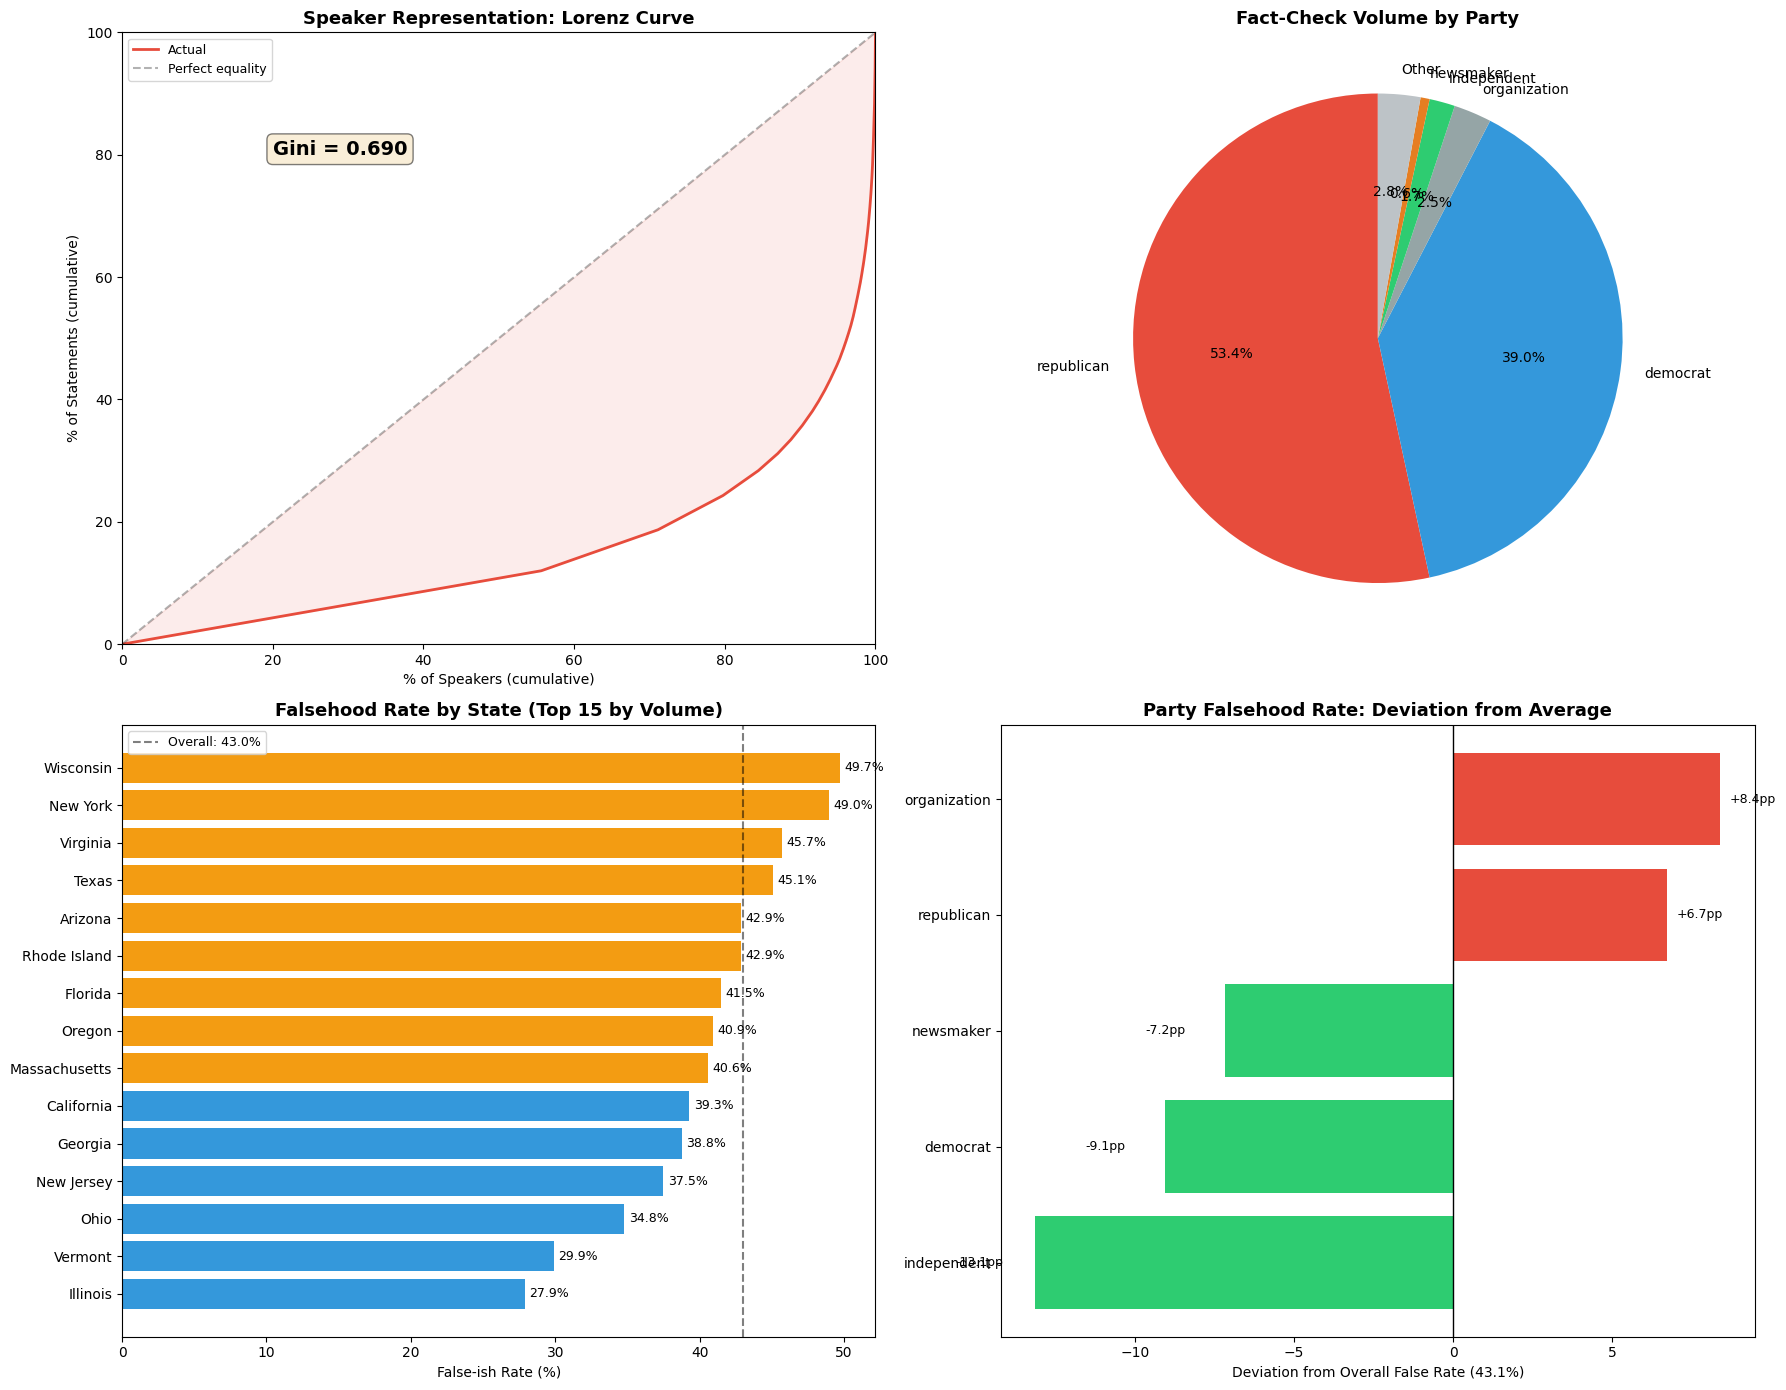

In [112]:
# Visuals: Bias & Fairness
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# 1. Speaker concentration - Lorenz curve
ax1 = axes[0, 0]
all_speaker_counts = bf.groupby('speaker').size().sort_values()
speaker_cumshare = all_speaker_counts.cumsum() / all_speaker_counts.sum() * 100
speaker_pct = np.arange(1, len(speaker_cumshare) + 1) / len(speaker_cumshare) * 100
ax1.plot(speaker_pct, speaker_cumshare.values, color='#e74c3c', linewidth=2, label='Actual')
ax1.plot([0, 100], [0, 100], 'k--', alpha=0.3, label='Perfect equality')
ax1.fill_between(speaker_pct, speaker_cumshare.values, speaker_pct, alpha=0.1, color='#e74c3c')
ax1.set_xlabel('% of Speakers (cumulative)')
ax1.set_ylabel('% of Statements (cumulative)')
ax1.set_title('Speaker Representation: Lorenz Curve', fontsize=13, fontweight='bold')
ax1.legend(fontsize=9)
ax1.set_xlim(0, 100)
ax1.set_ylim(0, 100)
# Gini coefficient
n = len(all_speaker_counts)
gini = (2 * np.sum(np.arange(1, n + 1) * all_speaker_counts.values) / (n * all_speaker_counts.sum()) - (n + 1) / n)
ax1.text(20, 80, f'Gini = {gini:.3f}', fontsize=14, fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 2. Party fact-check volume (pie chart)
ax2 = axes[0, 1]
party_top5 = party_stmt_counts.head(5)
party_other = party_stmt_counts.iloc[5:].sum()
pie_data = pd.concat([party_top5, pd.Series({'Other': party_other})])
pie_colors = ['#e74c3c', '#3498db', '#95a5a6', '#2ecc71', '#e67e22', '#bdc3c7']
wedges, texts, autotexts = ax2.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%',
                                    colors=pie_colors, startangle=90)
ax2.set_title('Fact-Check Volume by Party', fontsize=13, fontweight='bold')

# 3. State false rate bar chart (top 15 qualified states by volume)
ax3 = axes[1, 0]
state_top15 = state_qualified.sort_values('n', ascending=False).head(15).sort_values('false_rate_%', ascending=True)
colors_state = ['#e74c3c' if x > 50 else '#f39c12' if x > 40 else '#3498db' for x in state_top15['false_rate_%']]
ax3.barh(range(len(state_top15)), state_top15['false_rate_%'], color=colors_state)
ax3.set_yticks(range(len(state_top15)))
ax3.set_yticklabels(state_top15.index)
ax3.set_xlabel('False-ish Rate (%)')
ax3.set_title('Falsehood Rate by State (Top 15 by Volume)', fontsize=13, fontweight='bold')
overall_rate = bf['label'].isin(falseish_labels).mean() * 100
ax3.axvline(x=overall_rate, color='black', linestyle='--', alpha=0.5, label=f'Overall: {overall_rate:.1f}%')
ax3.legend(fontsize=9)
for i, v in enumerate(state_top15['false_rate_%']):
    ax3.text(v + 0.3, i, f'{v:.1f}%', va='center', fontsize=9)

# 4. Party × false rate: observed vs expected (standardized residuals)
ax4 = axes[1, 1]
top_party_names = party_stmt_counts.head(5).index
ct_bias = pd.crosstab(bf[bf['party'].isin(top_party_names)]['party'],
                       bf[bf['party'].isin(top_party_names)]['label'].isin(falseish_labels),
                       margins=False)
ct_bias.columns = ['True-ish/Mixed', 'False-ish']
# Expected proportions
overall_false_pct = ct_bias['False-ish'].sum() / ct_bias.sum().sum() * 100
observed = (ct_bias['False-ish'] / ct_bias.sum(axis=1) * 100)
expected_val = overall_false_pct

deviation = observed - expected_val
deviation = deviation.sort_values()
colors_dev = ['#2ecc71' if d < 0 else '#e74c3c' for d in deviation]
ax4.barh(range(len(deviation)), deviation.values, color=colors_dev)
ax4.set_yticks(range(len(deviation)))
ax4.set_yticklabels(deviation.index)
ax4.set_xlabel(f'Deviation from Overall False Rate ({expected_val:.1f}%)')
ax4.set_title('Party Falsehood Rate: Deviation from Average', fontsize=13, fontweight='bold')
ax4.axvline(x=0, color='black', linewidth=1)
for i, v in enumerate(deviation.values):
    ax4.text(v + (0.3 if v >= 0 else -2.5), i, f'{v:+.1f}pp', va='center', fontsize=9)

plt.tight_layout()
plt.show()

## Bias & Fairness Checks — Policy Implications

### Three Layers of Bias in this Dataset:

---

#### 1. Speaker Concentration Bias
- **0.87% of speakers produce 30.4% of all fact-checked statements**
- Gini coefficient = **0.690** (high inequality — closer to 1 = more concentrated)
- A handful of high-profile politicians (likely presidential candidates) dominate the dataset
- **Risk**: Any model trained on this data learns to predict falsehood for *famous politicians*, not politicians in general

#### 2. Partisan Fact-Check Selection Bias
- **Republicans are fact-checked 37% more often** than Democrats (R/D ratio = 1.37)
- Republicans also have higher fact-check *intensity* (5.82 stmts/speaker vs 4.64 for Democrats)
- Label distribution differs **significantly** by party (χ² = 267.5, p < 0.0001)
- **Critical question**: Is the higher Republican false rate (49.7%) a reflection of:
  - (a) Actual behavior differences?
  - (b) Selection bias — fact-checkers disproportionately target Republican claims?
  - (c) Both?
- **This dataset cannot distinguish between (a) and (b)** — it only captures what was fact-checked

#### 3. Geographic Concentration Bias
- **Top 5 states account for 48.7%** of all statements (Texas, Florida, Wisconsin, New York, Illinois)
- Label distribution **differs significantly by state** (χ² = 230.9, p < 0.0001)
- False rates range from **27.9%** (Illinois) to **69.4%** (Minnesota)
- 11.6% of statements have missing state data
- Driven by **PolitiFact affiliate locations** (e.g., PolitiFact Wisconsin, PolitiFact Florida)

### What This Means for Policy:

1. **Any model trained on this data inherits these biases** — predictions will be skewed toward high-profile, Republican-leaning, swing-state politicians

2. **Cannot use this dataset alone to claim one party lies more** — the fact-checking selection process itself is biased. A fair comparison would require a random sample of all political statements, not just those selected for fact-checking

3. **Geographic generalizability is limited** — results are driven by a few states with active PolitiFact bureaus, not a nationally representative sample

4. **For policy recommendations**: Any misinformation detection system must be audited for:
   - Partisan balance in training data
   - Geographic coverage
   - Speaker diversity
   - Selection mechanism transparency

### This Section Matters Because:
> A classifier that appears "accurate" but is trained on biased data may systematically flag one party more than another — **creating the very censorship problem it claims to solve.**